In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import billboard
import sqlite3
from urllib.request import urlretrieve
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import os
import requests as req
import json
import time
import random


In [2]:
path = '/Users/dankang/Desktop/SpringBoard/Spotify/Data/Processed Data/cleaned_data.csv'
year_path = '/Users/dankang/Desktop/SpringBoard/Spotify/Data/Raw_Data/data_by_year.csv'
df = pd.read_csv(path)
yearly_data = pd.read_csv(year_path)

In [3]:
df.head()

Unnamed: 0  valence  year  acousticness  \
0           0   0.0594  1921         0.982   
1           1   0.9630  1921         0.732   
2           2   0.0394  1921         0.961   
3           3   0.1650  1921         0.967   
4           4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       831667   0.211         0          0.878000   10     0.665   -20.096   
1       180533   0.341         0          0.000000    7     0.160   -12.441   
2       500062   0.166         0          0.913000    3     0.101   -14.850   
3       210000   0.309         0          0.000028    5     0.381    -9.316   
4       166693   0.193         0          0.000002    3     0.229   -10.096   

   mode                                               name  popularity  \
0     1  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1     1                            Clancy Lowered the Boom           5   
2     1                                          Gati Bali           5   
3     1                                          Danny Boy           3   
4     1                        When Irish Eyes Are Smiling           2   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133638 entries, 0 to 133637
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        133638 non-null  int64  
 1   valence           133638 non-null  float64
 2   year              133638 non-null  int64  
 3   acousticness      133638 non-null  float64
 4   artists           133638 non-null  object 
 5   danceability      133638 non-null  float64
 6   duration_ms       133638 non-null  int64  
 7   energy            133638 non-null  float64
 8   explicit          133638 non-null  int64  
 9   instrumentalness  133638 non-null  float64
 10  key               133638 non-null  int64  
 11  liveness          133638 non-null  float64
 12  loudness          133638 non-null  float64
 13  mode              133638 non-null  int64  
 14  name              133638 non-null  object 
 15  popularity        133638 non-null  int64  
 16  speechiness       13

In [5]:
df.tail()

Unnamed: 0  valence  year  acousticness                artists  \
133633      170646   0.5220  2020         0.204              ['Gunna']   
133634      170647   0.0838  2020         0.974       ['Najma Wallin']   
133635      170649   0.7340  2020         0.206           ['Ashnikko']   
133636      170650   0.6370  2020         0.101            ['MAMAMOO']   
133637      170652   0.6420  2020         0.132  ['KEVVO', 'J Balvin']   

        danceability  duration_ms   energy  explicit  instrumentalness  key  \
133633         0.598       230600  0.47200         1          0.000015    0   
133634         0.175       133500  0.00759         0          0.925000    7   
133635         0.717       150654  0.75300         0          0.000000    7   
133636         0.634       211280  0.85800         0          0.000009    4   
133637         0.856       189507  0.72100         1          0.004710    7   

        liveness  loudness  mode                             name  popularity  \
133633     0.108   -10.991     1           NASTY GIRL / ON CAMERA          66   
133634     0.113   -35.072     1                  Med slutna ögon          70   
133635     0.101    -6.020     1      Halloweenie III: Seven Days          68   
133636     0.258    -2.226     0                              AYA          76   
133637     0.182    -4.928     1  Billetes Azules (with J Balvin)          74   

        speechiness    tempo  
133633       0.2580  120.080  
133634       0.0454   70.872  
133635       0.0605  137.936  
133636       0.0809   91.688  
133637       0.1080   94.991

In [6]:
df.dtypes

Unnamed: 0            int64
valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
speechiness         float64
tempo               float64
dtype: object

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
song_df = df.set_index('name')

In [9]:
song_df.popularity.sort_values(ascending=False).head(10)

name
Dakiti                                     100
Mood (feat. iann dior)                      99
What You Know Bout Love                     96
Blinding Lights                             96
WAP (feat. Megan Thee Stallion)             96
positions                                   96
Holy (feat. Chance The Rapper)              95
Lonely (with benny blanco)                  95
you broke me first                          95
For The Night (feat. Lil Baby & DaBaby)     95
Name: popularity, dtype: int64

In [10]:
song_df.liveness.sort_values(ascending=False).head(10)

name
Up on Cripple Creek - Concert Version                                 1.000
Skin Deep - Live                                                      0.999
You Could Break My Heart - Live                                       0.998
The Chain - Live at Warner Brothers Studios in Burbank, CA 5/23/97    0.998
Encore                                                                0.997
Pero Te Amo - Live Version                                            0.997
Life in the Fast Lane - Live; 1999 Remaster                           0.997
El Próximo Viernes - Live Version                                     0.997
Strutter - Live/1975                                                  0.996
Whiplash (Live - Seattle '89)                                         0.996
Name: liveness, dtype: float64

In [11]:
song_df.danceability.sort_values(ascending=False).head(10)

name
Funky Cold Medina                   0.988
Go Girl                             0.986
POP, LOCK & DROPDEAD                0.985
Monday Nineteen Hours               0.983
Ice Ice Baby                        0.980
Dancing in My Room                  0.980
State of Shock                      0.980
Beepers                             0.979
UP LIKE AN INSOMNIAC - Freestyle    0.979
Binibi Rocha - Live                 0.978
Name: danceability, dtype: float64

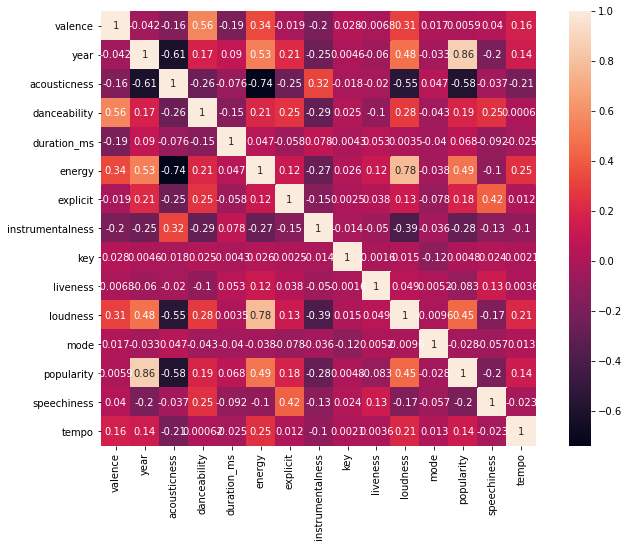

In [12]:
plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

In [13]:
#lets find the correlation between popularity and other numerical features 
#first isolate the numerical features
number_columns = df.columns[df.dtypes != 'object']
numeric_df = pd.DataFrame(data=df, columns=number_columns, index=df.index)
corr = np.abs(numeric_df.corr())
np.abs(corr['popularity']).sort_values(ascending=False)

popularity          1.000000
year                0.864993
acousticness        0.579798
energy              0.494281
loudness            0.453953
instrumentalness    0.284411
speechiness         0.201463
danceability        0.187198
explicit            0.181529
tempo               0.135938
liveness            0.082580
duration_ms         0.067799
mode                0.027641
valence             0.005937
key                 0.004781
Name: popularity, dtype: float64

Clearly most recent songs are most popular, which makes intuitive sense -- so perhaps an interesting exploratory analysis will be to determine which factors in fluence popularity within certain time periods (i.e. was energy more important than liveness in 2000 than it is today? etc.). Let's continue analyzing the basics first, and then we can break down the popularity by time era afterwards. 

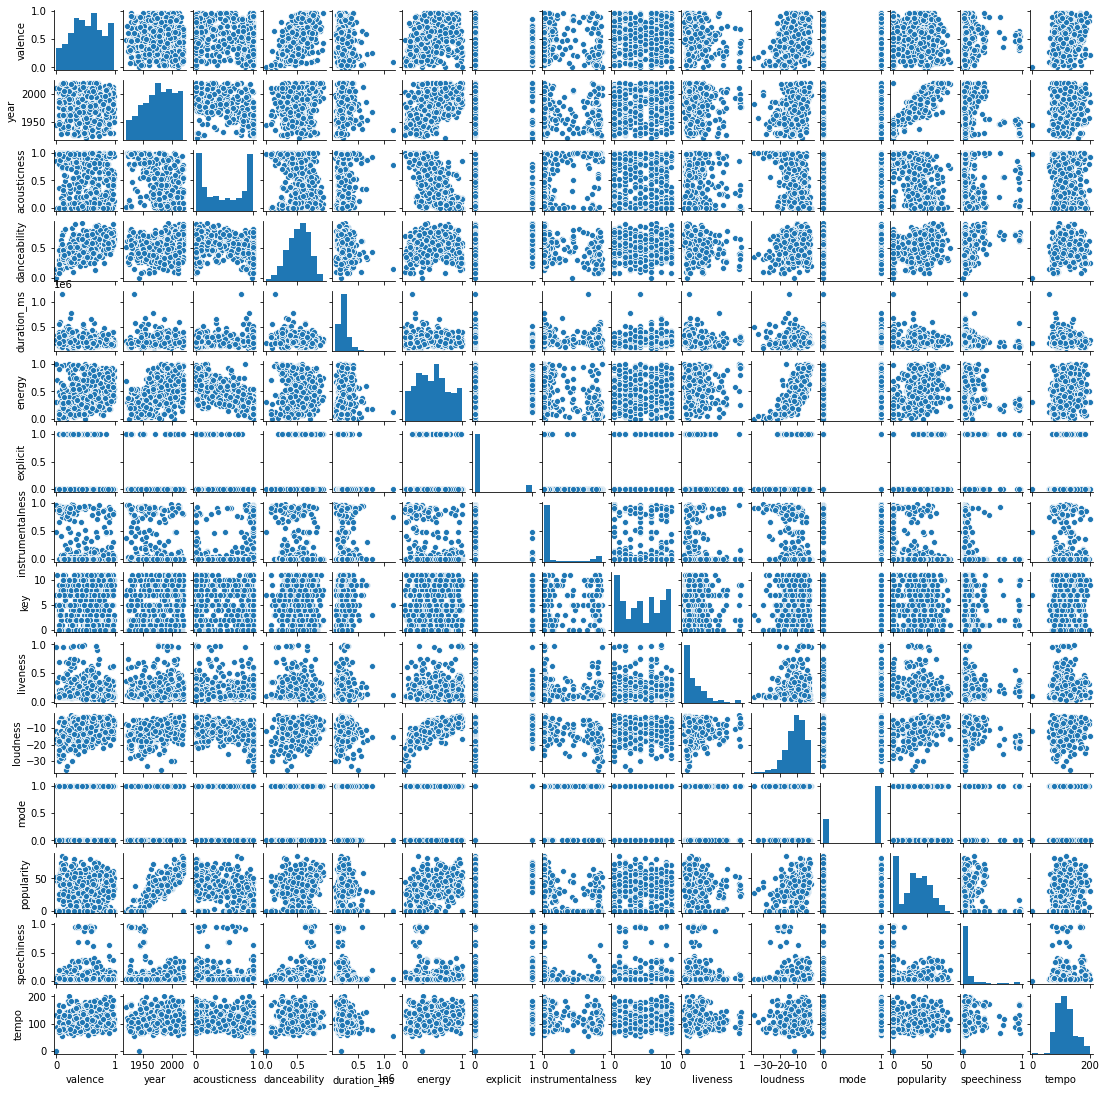

In [14]:
sns_plot = sns.pairplot(df.sample(500), height=1, vars=number_columns)
plt.show()

Lets actually try to isolate this by decade

In [15]:
def decade(year):
    beginning = int(year / 10) * 10
    decade = '{}s'.format(beginning)
    return decade

In [16]:
#create a decade column using our decade function
df['decade'] = df['year'].apply(decade)

<AxesSubplot:xlabel='decade', ylabel='count'>

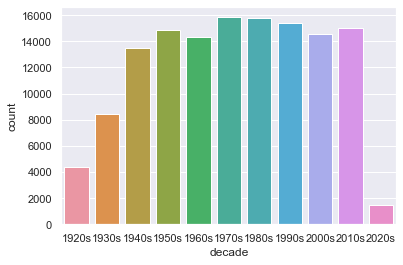

In [17]:
#lets look at the distribution of songs by decade
sns.set(color_codes={'figure.figsize':(10 ,5)})
sns.countplot(df['decade'])

In [18]:
#lets see how the key feature metrics changed over time
key_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(yearly_data, x='year', y=key_features, title='Key Song Feature Changes Over Time', facet_row_spacing=0.01)
fig.show()

In this case, we can see that over time: acousticness has come down, danceability and energy up, instrumentalness down, liveness more or less flat, and valence also fairly unchanged with some changes from the 50s to the 80s. Lets now isolate each of these features individually, starting from the top.

<AxesSubplot:>

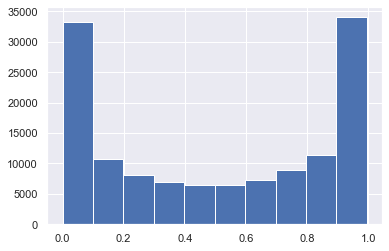

In [19]:
#distribution for acousticness
df.acousticness.hist()

Interestingly, most tracks either have very low acousticness or very high -- far fewer songs lie in between. Let's see how correlated it is with popularity. 

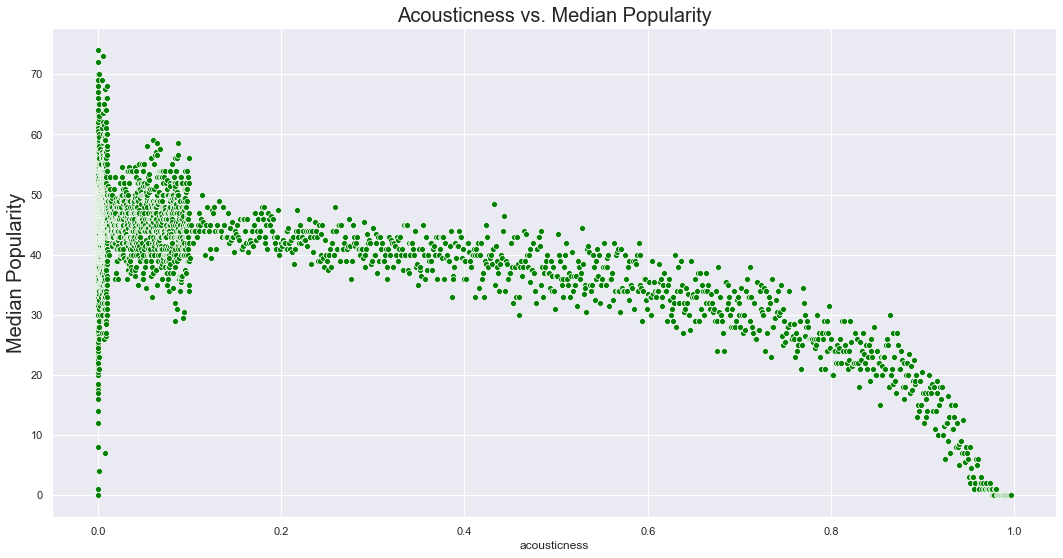

In [23]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('acousticness')['popularity'].median().to_frame().reset_index()
ax = sns.scatterplot(x = data['acousticness'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Acousticness vs. Median Popularity', fontsize=20)
ax.set_ylabel('Median Popularity', fontsize=20)
plt.show()

We see that the higher acousticness, generally median popularity decreases. We repeat this process for all features and take note. 

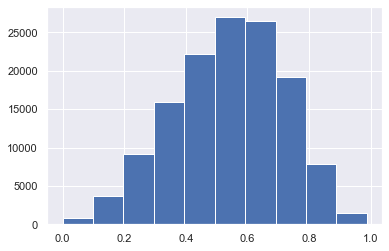

In [31]:
#distribution for acousticness
df.danceability.hist()
plt.show()

A much more normal distribution here.

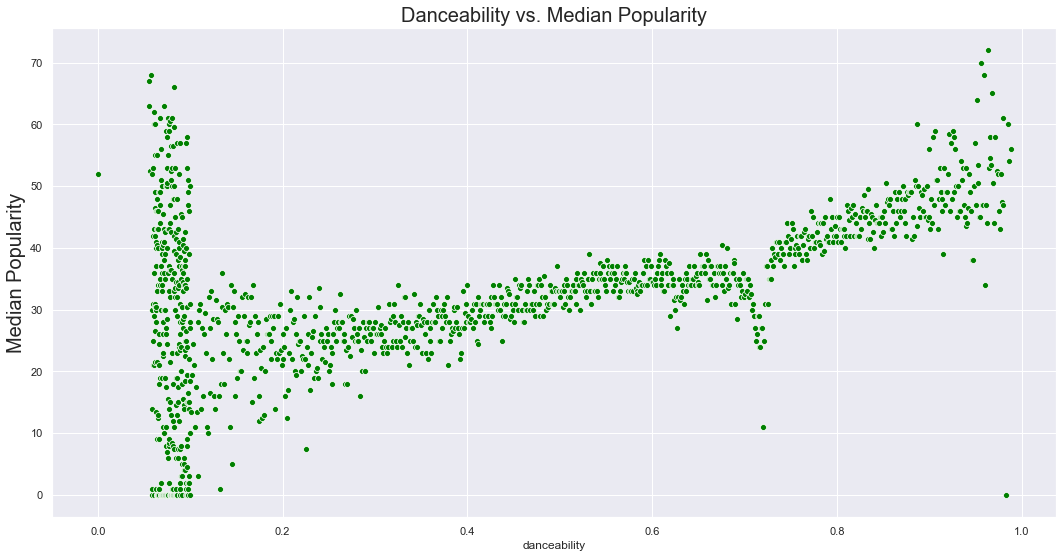

In [28]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('danceability')['popularity'].median().to_frame().reset_index()
ax = sns.scatterplot(x = data['danceability'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Danceability vs. Median Popularity', fontsize=20)
ax.set_ylabel('Median Popularity', fontsize=20)
plt.show()

Interestingly, songs with danceability ~0.1 have a wide range of median popularity values, and generally songs with higher danceability tend to have higher popularity. 

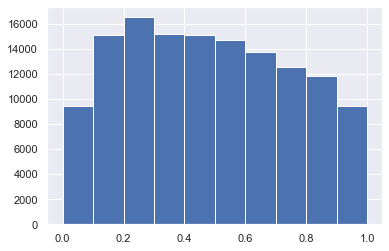

In [30]:
#lets look at song energy
df.energy.hist()
plt.show()

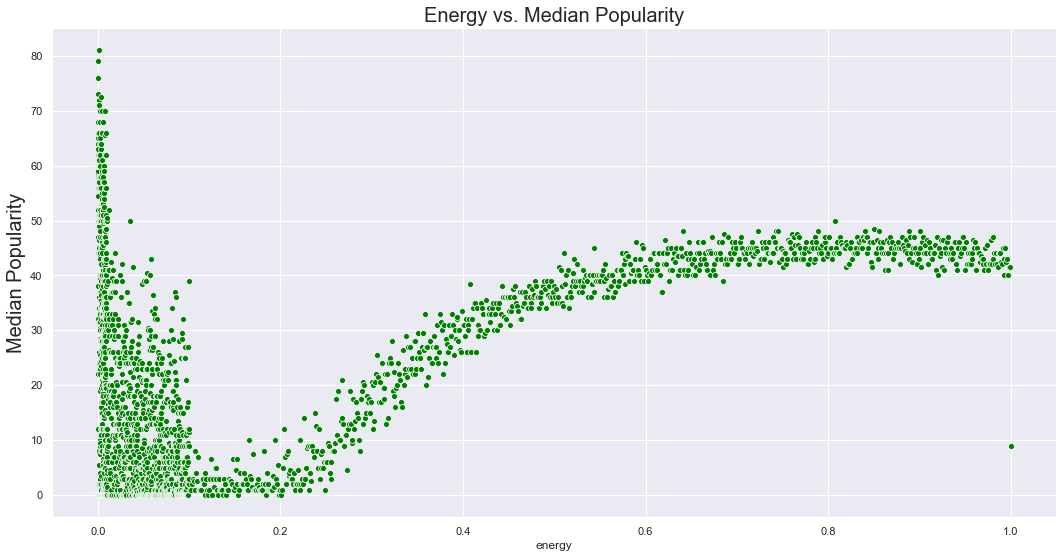

In [33]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('energy')['popularity'].median().to_frame().reset_index()
ax = sns.scatterplot(x = data['energy'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Energy vs. Median Popularity', fontsize=20)
ax.set_ylabel('Median Popularity', fontsize=20)
plt.show()

Interestingly, there are a lot of songs with high median popularity that are lower energy, though the number drops meaningfully after ~0.1, increases at an increasing rate until 0.4, and then slows and seems to reach and asypmtote of 45 after energy = 0.6. We check the mean to make sure the data looks relatively consistent. 

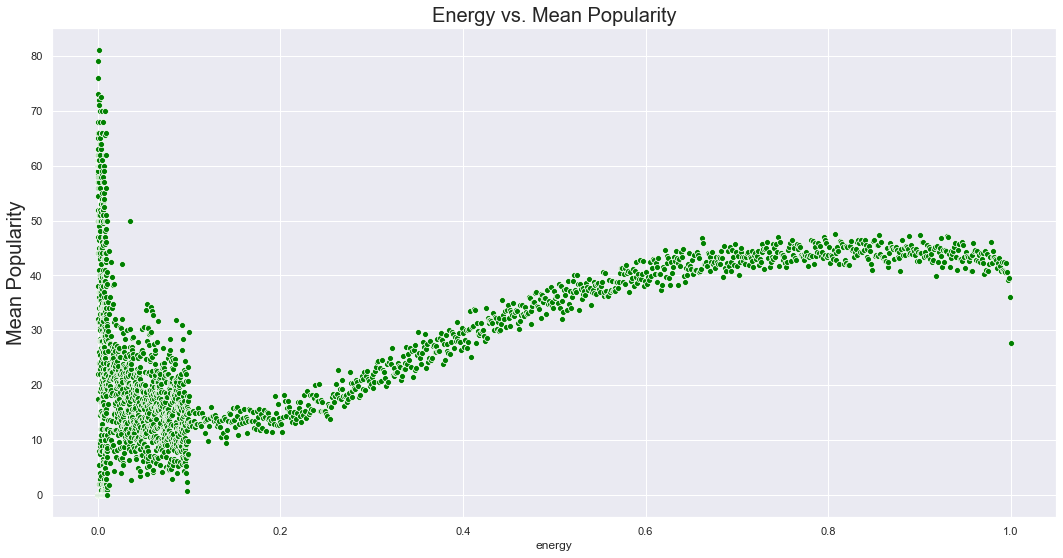

In [34]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = data['energy'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Energy vs. Mean Popularity', fontsize=20)
ax.set_ylabel('Mean Popularity', fontsize=20)
plt.show()

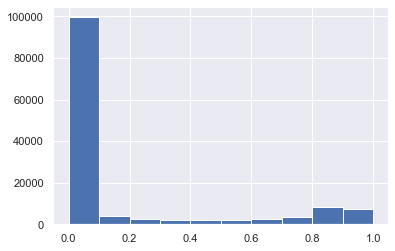

In [35]:
df.instrumentalness.hist()
plt.show()

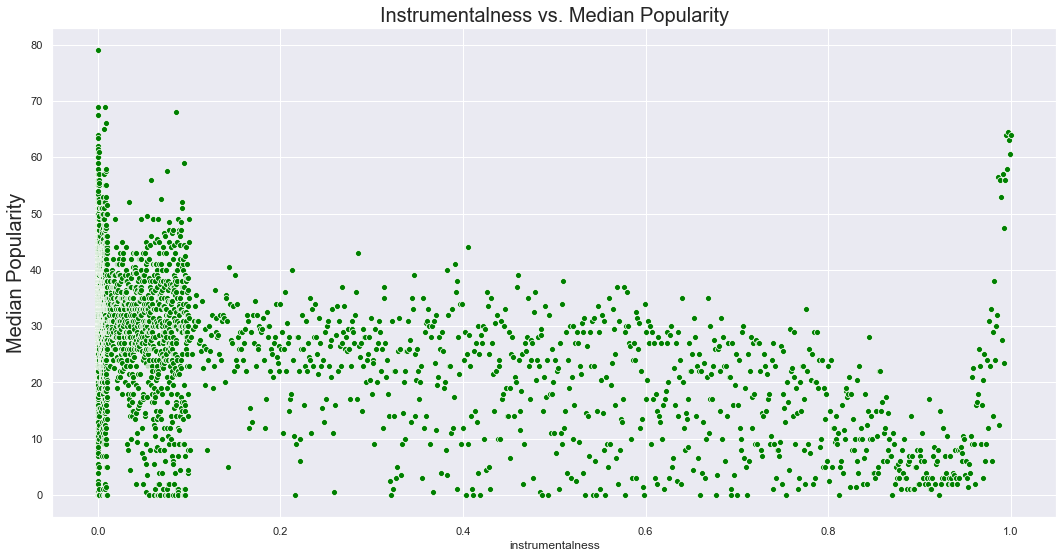

In [36]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('instrumentalness')['popularity'].median().to_frame().reset_index()
ax = sns.scatterplot(x = data['instrumentalness'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Instrumentalness vs. Median Popularity', fontsize=20)
ax.set_ylabel('Median Popularity', fontsize=20)
plt.show()

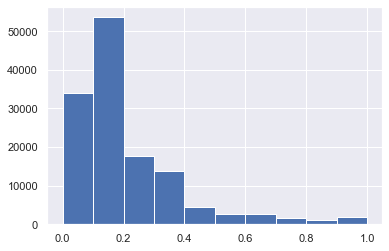

In [37]:
df.liveness.hist()
plt.show()

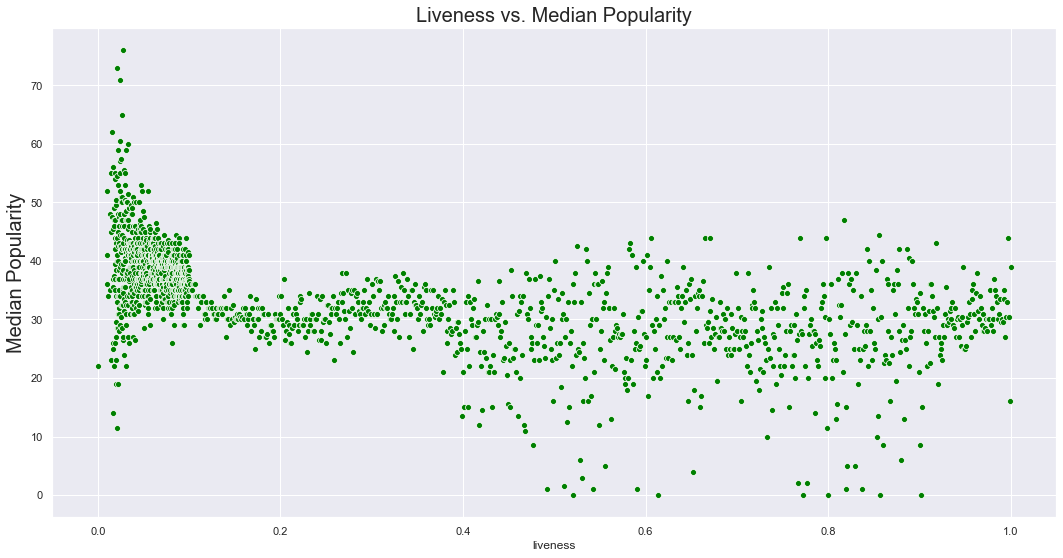

In [38]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('liveness')['popularity'].median().to_frame().reset_index()
ax = sns.scatterplot(x = data['liveness'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Liveness vs. Median Popularity', fontsize=20)
ax.set_ylabel('Median Popularity', fontsize=20)
plt.show()

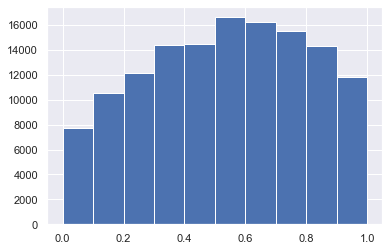

In [39]:
df.valence.hist()
plt.show()

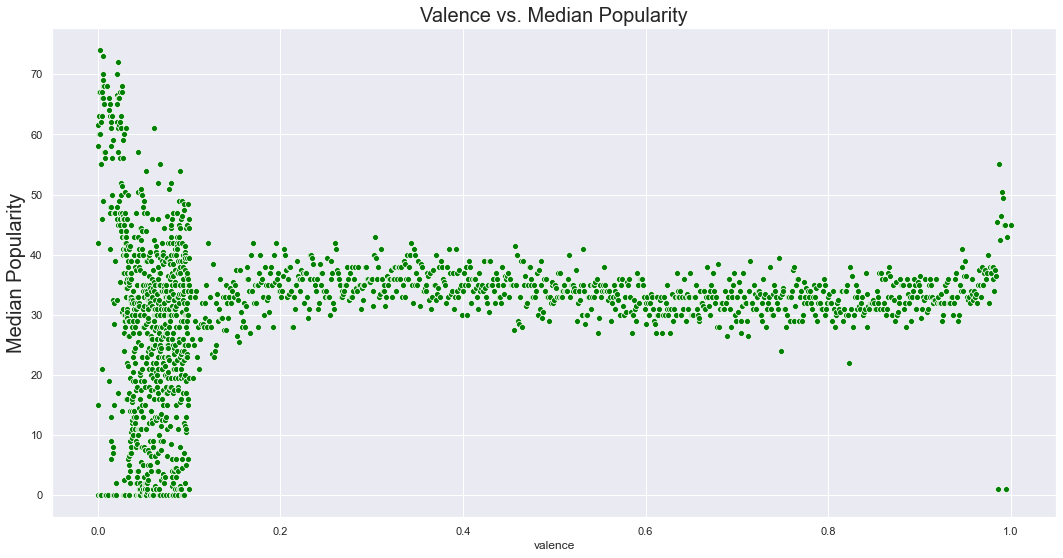

In [40]:
fig, ax = plt.subplots(figsize=(18, 9))
data =  df.groupby('valence')['popularity'].median().to_frame().reset_index()
ax = sns.scatterplot(x = data['valence'], y = data['popularity'], color='green', ax=ax)
ax.set_title('Valence vs. Median Popularity', fontsize=20)
ax.set_ylabel('Median Popularity', fontsize=20)
plt.show()